In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

    10 DataSets
    
        10 questions per dataset 
        
            Create a Notebook explaning Data as well Answering your Questions
            
                You can create a Report / PPT to explain your project 

In [2]:
sns.get_dataset_names()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
tip = sns.load_dataset('tips')

In [4]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [7]:
tip.isna().sum() / tip.shape[0]

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [10]:
pd.options.display.min_rows

10

In [15]:
pd.set_option('display.min_rows', 10)

In [16]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
pd.options.display.max_columns

20

In [21]:
pd.set_option('display.max_columns', 20)

In [22]:
tip.T

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
total_bill,16.99,10.34,21.01,23.68,24.59,25.29,8.77,26.88,15.04,14.78,...,15.53,10.07,12.6,32.83,35.83,29.03,27.18,22.67,17.82,18.78
tip,1.01,1.66,3.5,3.31,3.61,4.71,2,3.12,1.96,3.23,...,3,1.25,1,1.17,4.67,5.92,2,2,1.75,3
sex,Female,Male,Male,Male,Female,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Female,Male,Female,Male,Male,Female
smoker,No,No,No,No,No,No,No,No,No,No,...,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No
day,Sun,Sun,Sun,Sun,Sun,Sun,Sun,Sun,Sun,Sun,...,Sat,Sat,Sat,Sat,Sat,Sat,Sat,Sat,Sat,Thur
time,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,...,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner,Dinner
size,2,3,3,2,4,4,2,4,2,2,...,2,2,2,2,3,3,2,2,2,2


is there any relation between tip and total bill

i assume that average bill of male is always greater than average bill of female

may be sunday or saturday are the busiest days for a resturent 

it is more likely that people go on a restorent in group of 4-5 people

avg total_bill and avg tip of smokers greater than non smokers 



In [24]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
corr = np.corrcoef(tip['total_bill'], tip['tip'])

In [27]:
print(corr) # 1 rs - 1 rs tip

# -1 0 +1
# neg, 0, pos  1rs total_bill 0.67 rs 

[[1.         0.67573411]
 [0.67573411 1.        ]]


In [49]:
plt.style.use('ggplot')

In [50]:
#sns.set_style('whitegrid')

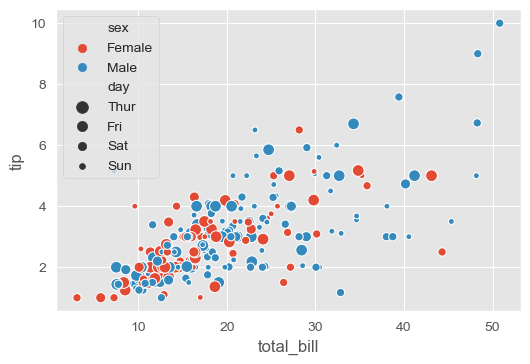

In [63]:
plt.figure(dpi=100)
sns.scatterplot('total_bill', 'tip', data=tip, hue='sex', size='day')
plt.show()

In [52]:
c = []
for value in tip['sex'].values:
    if value == 'Male':
        c.append('red')
    else:
        c.append('gray')

In [56]:
tip['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [57]:
size_dict = { 'Sun': 200, 'Sat': 150, 'Thur': 100, 'Fri': 50}

s = [ size_dict.get(value) for value in tip['day'].values ]

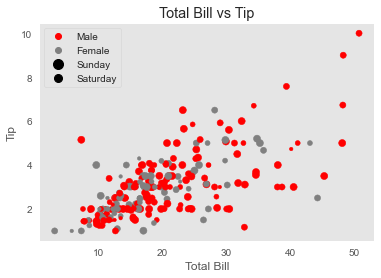

In [62]:
plt.plot(dpi=100)
plt.scatter(tip['total_bill'], tip['tip'], c=c, s=s, marker='.')
plt.plot([], [], 'ro', label='Male')
plt.plot([], [], 'ko', label='Female', color='gray')

plt.plot([], [], 'ko', markersize=10, label='Sunday')
plt.plot([], [], 'ko', markersize=8, label='Saturday')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.legend()
plt.grid()
plt.show()

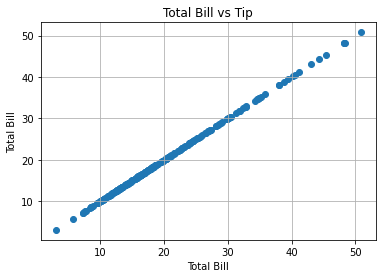

In [30]:
plt.plot(dpi=100)
plt.scatter(tip['total_bill'], tip['total_bill'])
plt.xlabel('Total Bill')
plt.ylabel('Total Bill')
plt.title('Total Bill vs Tip')
plt.grid()
plt.show()

In [35]:
tip.groupby('sex')[ ['total_bill', 'tip']].mean()

,total_bill,tip
sex,,
Male,20.744076,3.089618
Female,18.056897,2.833448


In [65]:
d = tip.groupby('day')['day'].count()

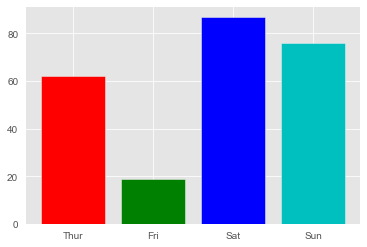

In [69]:
plt.bar(d.index, d.values, color=['r','g','b','c'])
plt.show()

In [71]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [76]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [81]:
plt.style.use( 'seaborn-notebook')

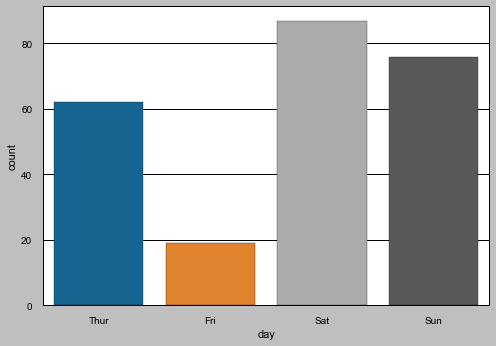

In [82]:
sns.countplot('day', data=tip)
plt.show()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [85]:
flight = sns.load_dataset('flights')

In [86]:
flight.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [88]:
x = flight.groupby('year').agg({'passengers': 'mean'})

In [95]:
x.reset_index(inplace=True)

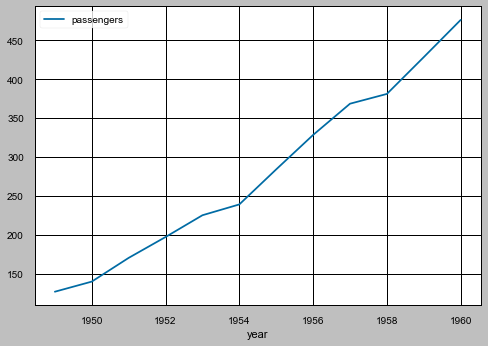

In [97]:
x.plot(x='year', y='passengers')
plt.show()

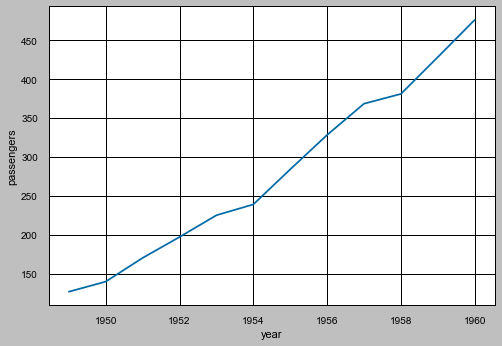

In [99]:
sns.lineplot('year', 'passengers', data=x)
plt.show()

In [101]:
tip.groupby('day')['total_bill'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


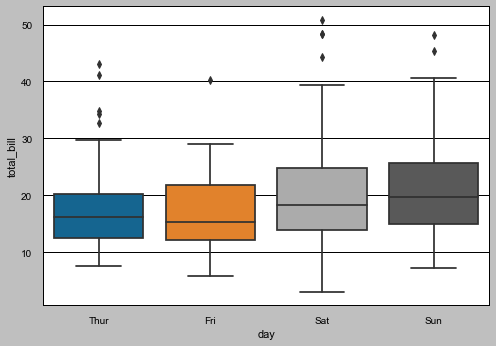

In [102]:
sns.boxplot('day', 'total_bill', data=tip)

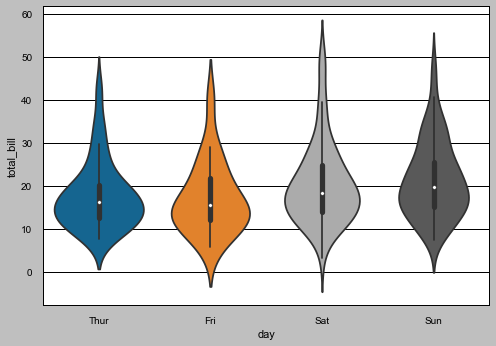

In [105]:
sns.violinplot('day', 'total_bill', data=tip)
plt.show()

In [111]:
sns.set_style('whitegrid')

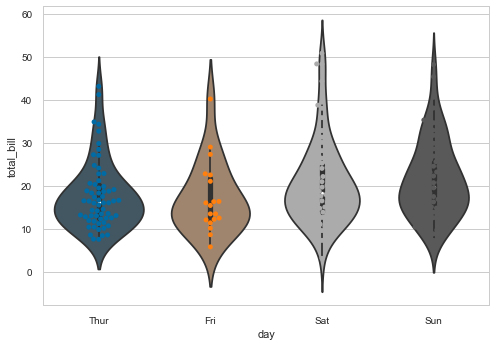

In [116]:

sns.violinplot('day', 'total_bill', data=tip, saturation=0.2)
sns.swarmplot('day', 'total_bill', data=tip, alpha=1)
plt.show()

In [103]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


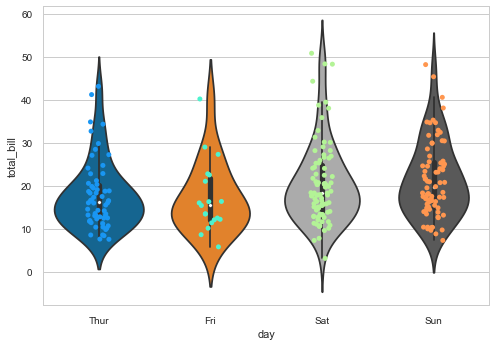

In [123]:
sns.violinplot('day', 'total_bill', data=tip)
sns.stripplot('day', 'total_bill', data=tip, palette='rainbow')
plt.show()

In [124]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


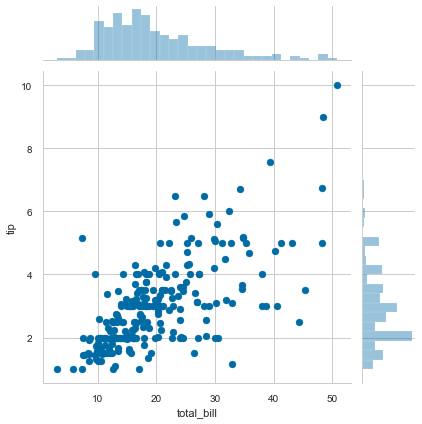

In [132]:
sns.jointplot('total_bill', 'tip', data=tip, marginal_kws={'bins':30})
plt.show()

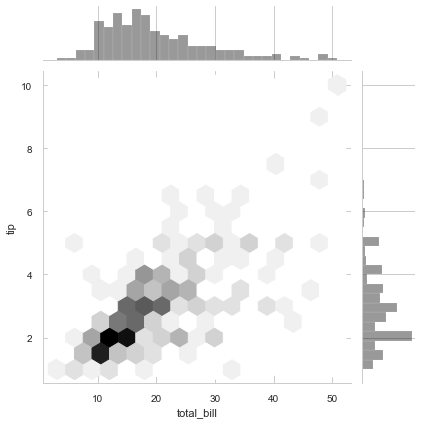

In [134]:
sns.jointplot('total_bill', 'tip', data=tip, marginal_kws={'bins':30},
             kind='hex', color='black')
plt.show()

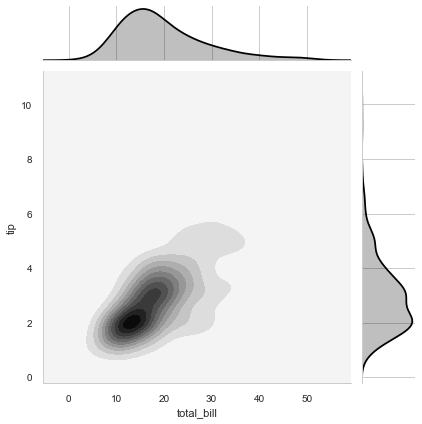

In [138]:
sns.jointplot('total_bill', 'tip', data=tip,
             kind='kde', color='black')
plt.show()

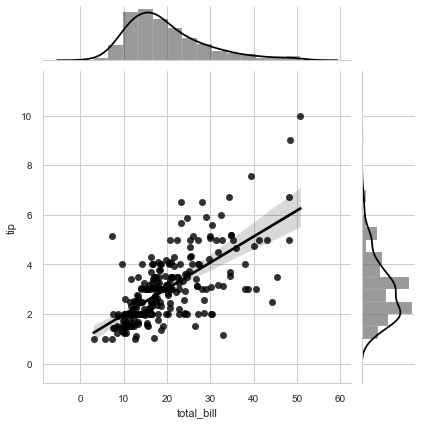

In [139]:
sns.jointplot('total_bill', 'tip', data=tip,
             kind='reg', color='black')
plt.show()

#### Web Scrapping

#### API

### Regular expression

### Machine Learning